In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
md=[]
fscores=[]
accscores=[]
aucscores=[]

In [4]:
df=pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [5]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [6]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [7]:
df.isnull().sum()


customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [8]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [9]:
df.gender[df.gender == 'Male'] = 1
df.gender[df.gender == 'Female'] = 0

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df['gender'].fillna(value=df['gender'].mode()[0],inplace=True)

In [11]:
df.gender.isnull().sum()

0

In [12]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [13]:
df['dependents'].fillna(value=df['dependents'].mode()[0],inplace=True)

In [14]:
df['dependents'].isnull().sum()

0

In [15]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [16]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [17]:
df['occupation'].fillna(value=df['occupation'].mode()[0],inplace=True)

In [18]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [19]:
df['city']

0         187.0
1           NaN
2         146.0
3        1020.0
4        1494.0
          ...  
28377    1020.0
28378    1046.0
28379    1096.0
28380    1219.0
28381    1232.0
Name: city, Length: 28382, dtype: float64

In [20]:
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [21]:
df['city'].fillna(value=df['city'].mean(),inplace=True)

In [22]:
df['city'].isnull().sum()

0

In [23]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [24]:
df['days_since_last_transaction']

0        224.0
1         60.0
2          NaN
3        147.0
4         58.0
         ...  
28377     70.0
28378     14.0
28379      0.0
28380      NaN
28381     59.0
Name: days_since_last_transaction, Length: 28382, dtype: float64

In [25]:
df['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

In [26]:
df['days_since_last_transaction'].fillna(value=df['days_since_last_transaction'].mean(),inplace=True)

In [27]:
df['days_since_last_transaction']

0        224.000000
1         60.000000
2         69.997814
3        147.000000
4         58.000000
            ...    
28377     70.000000
28378     14.000000
28379      0.000000
28380     69.997814
28381     59.000000
Name: days_since_last_transaction, Length: 28382, dtype: float64

In [28]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [29]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                              int64
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [30]:
dt=pd.get_dummies(df)


In [31]:
dt

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1,0.0,187.000000,2,755,224.000000,1458.71,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1,0.0,796.109576,2,3214,60.000000,5390.37,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1,0.0,146.000000,2,41,69.997814,3913.16,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,1,0.0,1020.000000,2,582,147.000000,2291.91,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1,2.0,1494.000000,3,388,58.000000,927.72,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0,0.0,1020.000000,2,1207,70.000000,1076.43,...,0.30,0.30,1076.43,1076.43,0,0,0,0,0,1
28378,30298,4919,34,0,0.0,1046.000000,2,223,14.000000,3844.10,...,901.00,1014.07,3738.54,3690.32,0,0,0,0,1,0
28379,30299,297,47,1,0.0,1096.000000,2,588,0.000000,65511.97,...,168.23,71.80,61078.50,57564.24,1,0,0,1,0,0
28380,30300,2585,50,1,3.0,1219.000000,3,274,69.997814,1625.55,...,0.20,0.20,1625.55,1625.55,0,0,0,0,1,0


([<matplotlib.patches.Wedge at 0x1d014a48278>,
 [Text(-0.9187639274916869, 0.6048742394415971, '0'),
  Text(0.9187639558078926, -0.604874196431153, '1')],
 [Text(-0.501143960450011, 0.3299314033317802, '81.5%'),
  Text(0.5011439758952141, -0.329931379871538, '18.5%')])

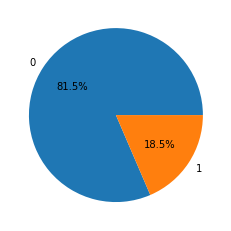

In [32]:
plt.pie(df['churn'].value_counts(),labels=df['churn'].unique(),autopct='%1.1f%%')

#change itt

In [33]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                              int64
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

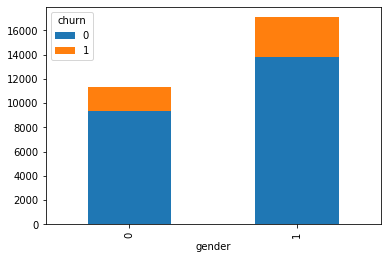

In [34]:
cts1 = df.groupby(['gender','churn']).churn.count().unstack()
cts1.plot(kind='bar', stacked=True)

In [35]:
print(cts1)
for i in range(0,2):
    sp=cts1[1][i]/(cts1[0][i]+cts1[1][i])
    print(sp*100)

churn       0     1
gender             
0        9324  1985
1       13798  3275
17.552391900256435
19.182334680489664


# based on gender ..we can see that about 19% male customers are more likely to leave thier job...females 17% likely to leav job

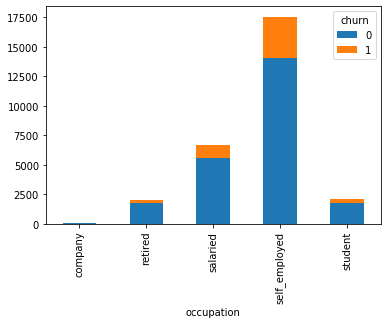

In [36]:
cts2 = df.groupby(['occupation','churn']).churn.count().unstack()
cts2.plot(kind='bar', stacked=True)

In [37]:
print(cts2)

churn              0     1
occupation                
company           36     4
retired         1719   305
salaried        5557  1147
self_employed  14076  3480
student         1734   324


In [38]:
for i in range(0,5):
    sp=cts2[1][i]/(cts2[0][i]+cts2[1][i])
    print(sp*100)

10.0
15.069169960474307
17.109188544152744
19.822282980177715
15.743440233236154


# based on occupation ....about 19% self employed peopl are likely to leave thier job

In [39]:
dt=pd.get_dummies(df)
dt.shape

(28382, 25)

In [40]:
(dt.drop_duplicates()).shape

(28382, 25)

In [41]:
dt

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1,0.0,187.000000,2,755,224.000000,1458.71,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1,0.0,796.109576,2,3214,60.000000,5390.37,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1,0.0,146.000000,2,41,69.997814,3913.16,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,1,0.0,1020.000000,2,582,147.000000,2291.91,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1,2.0,1494.000000,3,388,58.000000,927.72,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0,0.0,1020.000000,2,1207,70.000000,1076.43,...,0.30,0.30,1076.43,1076.43,0,0,0,0,0,1
28378,30298,4919,34,0,0.0,1046.000000,2,223,14.000000,3844.10,...,901.00,1014.07,3738.54,3690.32,0,0,0,0,1,0
28379,30299,297,47,1,0.0,1096.000000,2,588,0.000000,65511.97,...,168.23,71.80,61078.50,57564.24,1,0,0,1,0,0
28380,30300,2585,50,1,3.0,1219.000000,3,274,69.997814,1625.55,...,0.20,0.20,1625.55,1625.55,0,0,0,0,1,0


In [42]:
x=dt.drop(labels=['churn','customer_id'],axis=1)
y=(dt['churn'])
xt=x
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split as tts
trainx,testx,trainy,testy=tts(x,y,test_size=0.2)

# 1 Logistic Regression

In [44]:

from sklearn.linear_model import LogisticRegression as lgr 
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score,recall_score
lg=lgr(max_iter=4000)
lg.fit(trainx,trainy)
testl=lg.predict(testx)
print(classification_report(testl,testy))
print('score',lg.score(testx,testy))
print('f1 score ',f1_score(testl,testy))
print('accuracy score ',accuracy_score(testl,testy))
print('ruc aoc score ',roc_auc_score(testl,testy))
print('recall score ',recall_score(testl,testy))

md.append('Logistic')
fscores.append(f1_score(testl,testy))
accscores.append(accuracy_score(testl,testy))
aucscores.append(roc_auc_score(testl,testy))


              precision    recall  f1-score   support

           0       0.99      0.83      0.90      5566
           1       0.08      0.77      0.15       111

    accuracy                           0.82      5677
   macro avg       0.54      0.80      0.52      5677
weighted avg       0.98      0.82      0.89      5677

score 0.8249075215782984
f1 score  0.14751286449399656
accuracy score  0.8249075215782984
ruc aoc score  0.8003410345307578
recall score  0.7747747747747747


# 2 Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state=6)
model2.fit(trainx,trainy)
dtest=model2.predict(testx)

print(classification_report(dtest,testy))
print('score',model2.score(testx,testy))
print('f1 score ',f1_score(dtest,testy))
print('accuracy score ',accuracy_score(dtest,testy))
print('ruc aoc score ',roc_auc_score(dtest,testy))
print('recall score ',recall_score(dtest,testy))

md.append('DecisionTree')
fscores.append(f1_score(dtest,testy))
accscores.append(accuracy_score(dtest,testy))
aucscores.append(roc_auc_score(dtest,testy))


              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4579
           1       0.44      0.43      0.43      1098

    accuracy                           0.79      5677
   macro avg       0.65      0.65      0.65      5677
weighted avg       0.78      0.79      0.78      5677

score 0.7852739122776115
f1 score  0.4338132837900604
accuracy score  0.7852739122776115
ruc aoc score  0.6484532221422659
recall score  0.42531876138433516


# 3 RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=6)
model3.fit(trainx,trainy)

rtest=model3.predict(testx)
print(classification_report(rtest,testy))
print('score',model3.score(testx,testy))
print('f1 score ',f1_score(rtest,testy))
print('accuracy score ',accuracy_score(rtest,testy))
print('ruc aoc score ',roc_auc_score(rtest,testy))
print('recall score ',recall_score(rtest,testy))

md.append('RandomForest')
fscores.append(f1_score(rtest,testy))
accscores.append(accuracy_score(rtest,testy))
aucscores.append(roc_auc_score(rtest,testy))


              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5059
           1       0.42      0.72      0.53       618

    accuracy                           0.86      5677
   macro avg       0.69      0.80      0.73      5677
weighted avg       0.90      0.86      0.88      5677

score 0.8620750396336093
f1 score  0.5319784817692768
accuracy score  0.8620750396336093
ruc aoc score  0.7997437678756371
recall score  0.7200647249190939


# 4 AdaBoostClassifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier(random_state=6)
model4.fit(trainx,trainy)
atest = model4.predict(testx)
print(classification_report(atest,testy))
print('score',model4.score(testx,testy))
print('f1 score ',f1_score(atest,testy))
print('accuracy score ',accuracy_score(atest,testy))
print('ruc aoc score ',roc_auc_score(atest,testy))
print('recall score ',recall_score(atest,testy))

md.append('AdaBoost')
fscores.append(f1_score(atest,testy))
accscores.append(accuracy_score(atest,testy))
aucscores.append(roc_auc_score(atest,testy))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      5118
           1       0.38      0.71      0.49       559

    accuracy                           0.86      5677
   macro avg       0.67      0.79      0.70      5677
weighted avg       0.91      0.86      0.87      5677

score 0.8555575127708297
f1 score  0.49194547707558856
accuracy score  0.8555575127708297
ruc aoc score  0.7908154669653075
recall score  0.7101967799642218


# 5 XGBoost

In [48]:
import xgboost as xgb

model5 = xgb.XGBClassifier()
model5.fit(trainx,trainy)
xgtest = model5.predict(testx)
print(classification_report(xgtest,testy))
print('score',model4.score(testx,testy))
print('f1 score ',f1_score(xgtest,testy))
print('accuracy score ',accuracy_score(xgtest,testy))
print('ruc aoc score ',roc_auc_score(xgtest,testy))
print('recall score ',recall_score(xgtest,testy))

md.append('XGBoost')
fscores.append(f1_score(xgtest,testy))
accscores.append(accuracy_score(xgtest,testy))
aucscores.append(roc_auc_score(xgtest,testy))


              precision    recall  f1-score   support

           0       0.95      0.88      0.92      4966
           1       0.45      0.67      0.54       711

    accuracy                           0.86      5677
   macro avg       0.70      0.78      0.73      5677
weighted avg       0.89      0.86      0.87      5677

score 0.8555575127708297
f1 score  0.5402038505096264
accuracy score  0.8569667077681874
ruc aoc score  0.7772473070040834
recall score  0.6708860759493671


# 6 KNN Neighbours Classifier 

In [49]:
from sklearn.neighbors import KNeighborsClassifier as knn
def Elbow(Krange):
    #initiating empty list
    testerror = []
   
    #training model for evey value of K
    for i in Krange:
        #Instance oh KNN
        clf = knn(n_neighbors = i)
        clf.fit(trainx, trainy)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(testx)
        tmp = f1_score(tmp,testy)
        error = 1-tmp
        testerror.append(error)
    
    return testerror


In [50]:
krange = range(2, 10)

Text(0.5, 1.0, 'Elbow Curve for test')

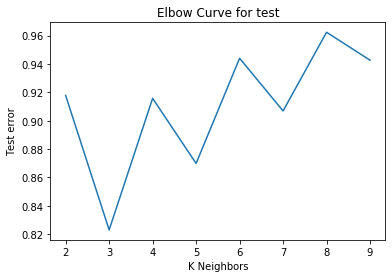

In [51]:
testknn = Elbow(krange)
plt.plot(krange, testknn)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [52]:
testerror=[]

In [53]:
model6=knn(n_neighbors=3)
model6.fit(trainx,trainy)
knntest=model6.predict(testx)
print(classification_report(knntest,testy))
print('score',model6.score(testx,testy))
print('f1 score ',f1_score(knntest,testy))
print('accuracy score ',accuracy_score(knntest,testy))
print('ruc aoc score ',roc_auc_score(knntest,testy))
print('recall score ',recall_score(knntest,testy))

md.append('KNN')
fscores.append(f1_score(knntest,testy))
accscores.append(accuracy_score(knntest,testy))
aucscores.append(roc_auc_score(knntest,testy))

              precision    recall  f1-score   support

           0       0.93      0.82      0.88      5241
           1       0.13      0.30      0.18       436

    accuracy                           0.78      5677
   macro avg       0.53      0.56      0.53      5677
weighted avg       0.87      0.78      0.82      5677

score 0.7838647172802536
f1 score  0.17706237424547283
accuracy score  0.7838647172802536
ruc aoc score  0.5633204322307004
recall score  0.30275229357798167


# 7 Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
model7 = GradientBoostingClassifier(random_state=6)
model7.fit(trainx, trainy)
gtest = model7.predict(testx)
print(classification_report(gtest,testy))
print('score',model6.score(testx,testy))
print('f1 score ',f1_score(gtest,testy))
print('accuracy score ',accuracy_score(gtest,testy))
print('ruc aoc score ',roc_auc_score(gtest,testy))
print('recall score ',recall_score(gtest,testy))

md.append('Gradient')
fscores.append(f1_score(gtest,testy))
accscores.append(accuracy_score(gtest,testy))
aucscores.append(roc_auc_score(gtest,testy))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5045
           1       0.43      0.72      0.54       632

    accuracy                           0.86      5677
   macro avg       0.70      0.80      0.73      5677
weighted avg       0.90      0.86      0.88      5677

score 0.7838647172802536
f1 score  0.5406046235921755
accuracy score  0.863484234630967
ruc aoc score  0.8013937850484876
recall score  0.7215189873417721


# 8 RidgeClassifier

In [55]:
from sklearn.linear_model import RidgeClassifier
model8 = RidgeClassifier(random_state=6).fit(trainx, trainy)
rctest = model8.predict(testx)
print(classification_report(rctest,testy))
print('score',model8.score(testx,testy))
print('f1 score ',f1_score(rctest,testy))
print('accuracy score ',accuracy_score(rctest,testy))
print('ruc aoc score ',roc_auc_score(rctest,testy))
print('recall score ',recall_score(rctest,testy))

md.append('RidgeClassifier')
fscores.append(f1_score(rctest,testy))
accscores.append(accuracy_score(rctest,testy))
aucscores.append(roc_auc_score(rctest,testy))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      5663
           1       0.01      0.57      0.01        14

    accuracy                           0.81      5677
   macro avg       0.50      0.69      0.46      5677
weighted avg       1.00      0.81      0.90      5677

score 0.814514708472785
f1 score  0.014967259120673529
accuracy score  0.814514708472785
ruc aoc score  0.6932721172523397
recall score  0.5714285714285714


# 9 SVC

In [56]:
from sklearn import svm
model9=svm.SVC(random_state=6).fit(trainx,trainy)
svctest = model9.predict(testx)
print(classification_report(svctest,testy))
print('score',model9.score(testx,testy))
print('f1 score ',f1_score(svctest,testy))
print('accuracy score ',accuracy_score(svctest,testy))
print('ruc aoc score ',roc_auc_score(svctest,testy))
print('recall score ',recall_score(svctest,testy))

md.append("SVC")
fscores.append(f1_score(svctest,testy))
accscores.append(accuracy_score(svctest,testy))
aucscores.append(roc_auc_score(svctest,testy))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      5630
           1       0.03      0.74      0.06        47

    accuracy                           0.82      5677
   macro avg       0.52      0.78      0.48      5677
weighted avg       0.99      0.82      0.89      5677

score 0.8182138453408491
f1 score  0.06352087114337568
accuracy score  0.8182138453408491
ruc aoc score  0.7817542798836024
recall score  0.7446808510638298


In [57]:
md

['Logistic',
 'DecisionTree',
 'RandomForest',
 'AdaBoost',
 'XGBoost',
 'KNN',
 'Gradient',
 'RidgeClassifier',
 'SVC']

In [58]:
rd={'model':md,'f1score':fscores,'accuracy':accscores,'aucroc':aucscores}

In [59]:
res=pd.DataFrame(rd)

In [60]:
res

,model,f1score,accuracy,aucroc
0,Logistic,0.147513,0.824908,0.800341
1,DecisionTree,0.433813,0.785274,0.648453
2,RandomForest,0.531978,0.862075,0.799744
3,AdaBoost,0.491945,0.855558,0.790815
4,XGBoost,0.540204,0.856967,0.777247
5,KNN,0.177062,0.783865,0.563320
6,Gradient,0.540605,0.863484,0.801394
7,RidgeClassifier,0.014967,0.814515,0.693272
8,SVC,0.063521,0.818214,0.781754


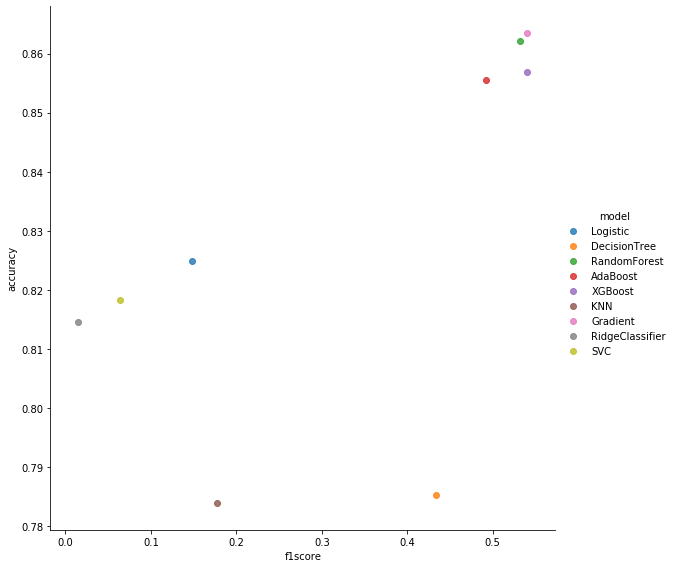

In [61]:
sns.lmplot('f1score', 'accuracy', hue='model', data=res, fit_reg=False,height=8)

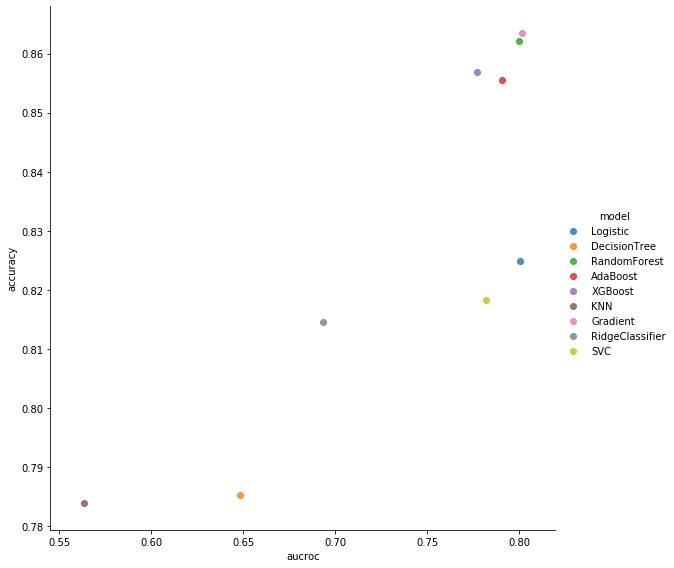

In [62]:
sns.lmplot('aucroc', 'accuracy', hue='model', data=res, fit_reg=False,height=8)

# implement cross val score on best fit model improve accuracy of the model  for gradient boosting



In [63]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(model7,trainx,trainy,cv=5)
scr

array([0.86743008, 0.86390663, 0.866329  , 0.87227483, 0.86412684])

In [64]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scr.mean(), scr.std() * 2))


Accuracy: 0.87 (+/- 0.01)


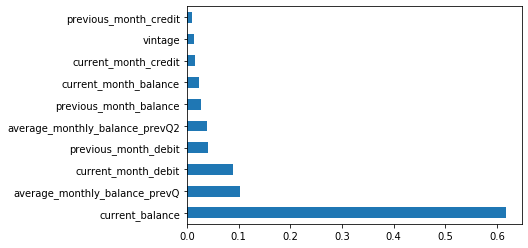

In [65]:
feat_importances = pd.Series(model7.feature_importances_, index=xt.columns)
feat_importances.nlargest(10).plot(kind='barh')

# feature importance is more for current balance
